## Example 1: Interference and Phase Kickback

### Purpose

This example notebook looks at the phenomena of quantum interference and Phase Kickback, which play a key role in many quantum algorithms, including the Quantum Fourier Transform (QFT), Quantum Phase Estimation (QPE) and Shor's algorithm. It is important to have some understanding of these phenomena before moving on the subsequent notebooks.

### Imports

The following Python imports will be needed:

In [1]:
from tinyqsim.qcircuit import QCircuit
import matplotlib.pyplot as plt
import numpy as np
from math import pi

These Unicode definitions will be useful for annotating quantum circuits:

In [2]:
PI = '\u03C0'  # Unicode pi
PHI = '\u03d5'  # Unicode phi
KET0 = '|0\u27E9' # Unicode ket |0>

### Interference

Two quantum states can be made to interfere with each other. If they are in phase, they will reinforce one another. If they are in anti-phase, they will cancel one another. Even a single qubit can interfere with itself, because it has two basis states $\ket{0}$ and $\ket{1}$. (If you are familiar with the well-known "Double-slit" experiment, this is like the way that a photon or electron can be in a superposition of going through both slits and interfering with itself.)

The following circuit demonstrates single-qubit interference, but the principle extends to multi-qubit systems. An N-qubit system has $2^N$ basis states.

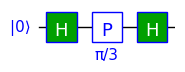

In [3]:
phi = pi/3

qc = QCircuit(1)
qc.qubit_labels({0: KET0}, numbers=False)
qc.h(0)
qc.p(phi, f'{PI}/3', 0)
qc.h(0)
qc.draw()

The circuit uses a phase (P) gate and two Hadamard (H) gates. Although very simple, this pattern is an important building block for quantum circuits.

The first Hadamard gate places the qubit in an equal superposition of $\ket{0}$ and $\ket{1}$. The phase gate then introduces a phase difference of $\frac{\pi}{3}$ radians (i.e. 60 degrees) between these two components. The final Hadamard gate undoes the effect of the first Hadamard, recombining the components, causing them to interfere with one another, increasing or decreasing their relative amplitudes.

The effect of the interference is now evident in the measurement probabilities:

In [4]:
print(qc.format_probabilities())

|0⟩  0.75
|1⟩  0.25


Sandwiching the phase gate between two Hadamard gates has converted a non-measurable phase difference into an observable probability difference.

### Effect of Phase Angle

We can run the circuit with different values of $\phi$ and plot the probabilities of measuring '0' and '1' as a function of the phase angle $\phi$.

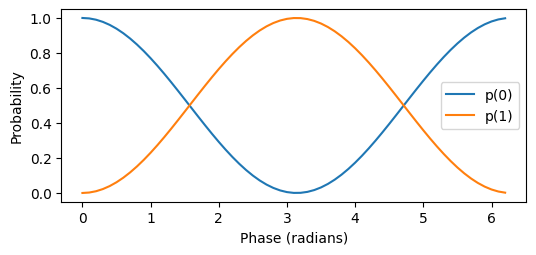

In [5]:
def calc_probs(phi):
    qc = QCircuit(1)
    qc.h(0)
    qc.p(phi, PHI, 0)
    qc.h(0)
    return qc.probability_array()

phis = np.arange(0, 2*pi, 0.1)
prob0, prob1 = np.array([calc_probs(p) for p in phis]).T
plt.figure(figsize=(6,2.5))
plt.plot(phis, prob0, label='p(0)')
plt.plot(phis, prob1, label='p(1)')
plt.xlabel('Phase (radians)')
plt.ylabel('Probability')
plt.legend()
pass

### Analysis

We will label points in the circuit A, B, C, D, so that we can refer to the state at these points as $\ket{\psi_A},\ket{\psi_B}$, etc:

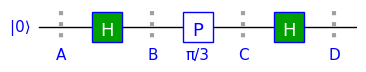

In [6]:
phi = pi/3
qc = QCircuit(1)
qc.qubit_labels({0: KET0}, numbers=False)
qc.barrier('A')
qc.h(0)
qc.barrier('B')
qc.p(phi, f'{PI}/3', 0)
qc.barrier('C')
qc.h(0)
qc.barrier('D')
qc.draw()

The initial state $\ket{\psi_A}$ is:

$$\qquad\ket{\psi_A}=\ket{0}$$

The first Hadamard gate transforms this into the superposition state:

$$\qquad\ket{\psi_B}=\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$

The phase gate is defined as:

$$\qquad P(\phi)=\ket{0}\bra{0}+e^{i\phi}\ket{1}\bra{1}$$

When applied to the superposition state, it gives:

$$\qquad\ket{\psi_C}=\frac{1}{\sqrt{2}}(\ket{0} + e^{i\phi}\ket{1})$$

Finally, the second Hadamard gate results in the state:

$$\qquad\ket{\psi_D}={\small\frac{1}{2}}\left[(\ket{0}+\ket{1}) + e^{i\phi}(\ket{0}-\ket{1})\right]$$

which can be rewritten as:

$$\qquad\ket{\psi_D}=\frac{1}{2}\left[(1 + \cos{\phi}+ i\sin{\phi})\ket{0} + (1 - \cos{\phi} - i\sin{\phi})\ket{1} \right]$$

For $\phi=\frac{\pi}{3}$, we can substitute $\cos{\phi}=\frac{\sqrt{3}}{2}$ and $\sin{\phi}=\frac{1}{2}$

which gives:

$$\qquad\ket{\psi}=\frac{1}{4}\left[(3 + i\sqrt{3})\ket{0}+(1-i\sqrt{3})\ket{1}\right]$$

If we print the final state of our circuit, we find that it agrees:

In [7]:
qc.display_state(prefix=r'\ket{\psi} = ')

<IPython.core.display.Math object>

The probabilities of measuring $\ket{0}$ and $\ket{1}$ are:

$$\qquad p(\ket{0})=\frac{1}{4}(3 + \sqrt{3}i)\ \frac{1}{4}[(3 - \sqrt{3}i) = \frac{3}{4}$$

$$\qquad p(\ket{1})=\frac{1}{4}(1 - \sqrt{3}i)\ \frac{1}{4}[(1 + \sqrt{3}i) = \frac{1}{4}$$

### Bloch-Sphere Description

Another way to understand the behaviour of the circuit is to plot the state vector on the Bloch sphere and follow it step-by-step as we perform each gate operation in turn. The Bloch sphere is only suitable for representing single-qubit systems, but the graphical visualization may help in building some intuition.

<div style="text-align: center;">
<img src="assets/bloch.png" alt="bloch" width="270"/>
</div>

The state vector is described by two angles on the Bloch sphere. The phase angle $\phi$ is measured clockwise about the +Z axis. The polar angle $\theta$ is measured relative to the +Z axis. So, $\theta=\frac{\pi}{2}$ corresponds to points on the "equator" of the sphere, where the measurement probabilities of 0 and 1 are equal.

The circuit starts in an initial state of $\ket{0}$ which is in the +Z direction, as shown below by the red vector:

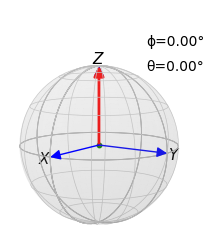

In [8]:
qc = QCircuit(1)
qc.plot_bloch(scale=0.75)

In this state, there is a 100% probability of getting state $\ket{0}$ if we make a measurement.

The first gate is a Hadamard (H) gate. Hadamard gates perform a 180 degree rotation about an axis mid-way between the X and Z axes (sometimes called the 'X+Z' axis). This operation can be viewed as a basis change that swaps the role of the X and Z axes. It has the effect of transforming the Z-basis state $\ket{0}$ into the superposition state $\ket{+}=\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})$, which is a basis state of the X basis.

Consequently, after the first Hadamard gate, the state vector is in the +X direction:

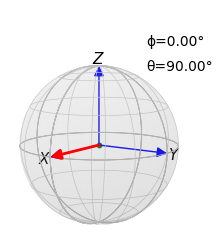

In [9]:
qc.h(0)
qc.plot_bloch(scale=0.75)

There are now equal probabilities of measuring 0 or 1.

In [10]:
print(qc.format_probabilities())

|0⟩  0.5
|1⟩  0.5


Next, the phase (P) gate in our example circuit rotates the state vector 60 degrees clockwise about the +Z axis:

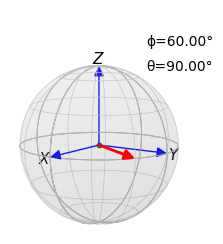

In [11]:
qc.p(phi, PHI, 0)
qc.plot_bloch(scale=0.75)

The measurement probabilities of $\ket{0}$ and $\ket{1}$ are still both 50%:

The final Hadamard gate undoes the original Hadamard transformation, leaving the state vector at an angle of 60 degrees to the original $\ket{0}$ state.

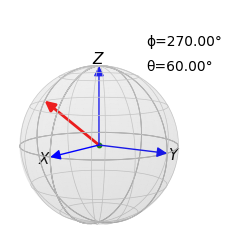

In [12]:
qc.h(0)
qc.plot_bloch(scale=0.75)

The two basis states now have different measurement probabilities. There is now a 75% probability of measuring a '0' and 25% probability of measuring a '1'.

In [13]:
print(qc.format_probabilities())

|0⟩  0.75
|1⟩  0.25


One way to think about the circuit is that the Hadamard-sandwich $HPH$ transforms the phase (P) gate so that it rotates about X instead of Z. A phase change then becomes a measurable amplitude change. Another way to think about it is that the first Hadamard places the state in a superposition. The phase gate then introduces a phase difference between the $\ket{0}$ and $\ket{1}$ states. The second Hadamard then causes the two states to interfere with one another, leading to an observable amplitude difference.

Many quantum algorithms work by placing a set of qubits in a joint superposition and then selectively modifying the phases to amplify valid solutions using constructive interference. A final Hadamard or Fourier transform then puts the state back in a form where we can see the phase difference as amplitude differences when we measure the output state.

### Phase Kickback

Phase Kickback is an effect in which controlled gates can have an effect on their control qubits. It is an important building block in many quantum algorithms such as the Quantum Fourier Transform (QFT), Quantum Phase Estimation (QPE) and Shor's Algorithm.

Consider the following circuit which uses a controlled-phase (CP) gate. The two qubits are assumed to be initialized to the $\ket{0}$ state.

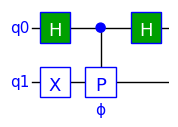

In [14]:
phi = pi/3

qc = QCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(pi/3, PHI, 0, 1)
qc.h(0)
qc.draw()

The output state is:

In [15]:
qc.display_state(prefix=r'\ket{\psi} = ')

<IPython.core.display.Math object>

This is not an entangled state, because it can be written as the tensor product of qubit states:

$$\qquad\ket{\psi}=\left[(0.75+0.43301j)\ket{0}+(0.25-0.43301j)\ket{1}\right] \otimes\ket{1}$$

Consequently, we can consider the qubit states separately. The first qubit state is:

$$\qquad(0.75+0.43301j)\ket{0}+(0.25-0.43301j)\ket{1}$$

which is exactly the same result we got earlier from the interference experiment on a single qubit.

The second qubit state is just $\ket{1}$, which is the result of its initialization by the X gate, so it has not been affected by the phase gate.

This effect is called "Phase Kickback". The phase resulting from a controlled gate is "kicked back" onto the control input and the target input is left unaffected. There were two things necessary to make this example work. The control input had to be in an equal superposition state and the target input had to be in an eigenvector of the controlled operation.

The phase gate is defined as:

$$\qquad \text{P}(\phi)=\ket{0}\bra{0}+e^{i\phi}\ket{1}\bra{1}$$

This has eigenvectors $\ket{0}$ and $\ket{1}$ with eigenvalues $1$ and $e^{i\phi}$, respectively. We selected the eigenvector $\ket{1}$ by using the X gate on the target input, which resulted in the phase $\phi$, corresponding to the eigenvalue $e^{i\phi}$, appearing on the control qubit.

The phase-kickback circuit is behaving as if it were the following circuit, in which the first qubit is just like our earlier interference circuit:

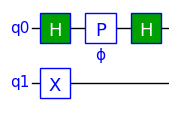

<IPython.core.display.Math object>

In [16]:
phi = pi/3

qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.p(pi/3, PHI, 0)
qc.h(0)
qc.draw()
qc.display_state(prefix=r'\ket{\psi} = ')

Indeed, this is the same result as for the phase kickback circuit.

Phase Kickback may seem very strange, because we often think of the control of a controlled gate as an enabling input, such that a $\ket{1}$ on the control qubit enables the controlled operation on the target qubit and a $\ket{0}$ on the control causes the gate to have no effect. However, this is a misleading way to think about controlled gates. It is valid when the control is in the computational basis state, $\ket{0}$ or $\ket{1}$. However, when the control is in a superposition state, the output of the gate is a superposition of its its outputs for each of the basis states, but this may no longer behave like a simple control action.

For example, consider a controlled-X (CX) gate sandwiched between Hadamard gates:

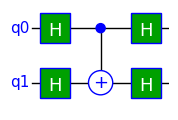

In [17]:
qc1 = QCircuit(2)
qc1.h([0,1])
qc1.cx(0,1)
qc1.h([0,1])
qc1.draw()

This is exactly equivalent to the following circuit, in which the roles of the control and target qubits are interchanged:

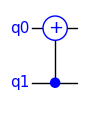

In [18]:
qc2 = QCircuit(2)
qc2.cx(1,0)
qc2.draw()

We can verify this by comparing the unitary matrices of the two circuits:

In [19]:
print(np.allclose(qc1.to_unitary(), qc2.to_unitary()))

True


The "Hadamard sandwich" effectively changes the basis from Z to X. This has the effect of reversing the roles of the control and target qubits. So, the concept of a particular qubit of a gate being the control is dependent on the basis.

### Generalizing the Example

The example used the specific case of a controlled phase gate, so that we could compare the result with our earlier interference experiment. However, phase kickback works for any controlled unitary. We will now consider the more general case of a controlled unitary $U$ which has its target input initialized to $\ket{u_k}$, which is an eigenvector of $U$.

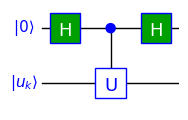

In [20]:
# Ignore this code. It is just used to draw a circuit diagram.
KET_U = fr'|$u_k$''\u27E9'
qc = QCircuit(2)
qc.qubit_labels({0: KET0, 1: KET_U}, numbers=False)
qc.h(0)
qc.cu(np.eye(2), 'U', 0, 1)
qc.h(0)
qc.draw()

Any unitary operator can be expressed in terms of the phases $\phi_k$ of its eigenvectors $\ket{u_k}$, as follows:

$$\qquad U=\sum_k{e^{i\phi_k}\,\ket{u_k}\bra{u_k}}$$

where $\lambda_k = e^{i\phi_k}$ are the corresponding eigenvalues.

The eigenvalue always has a magnitude of one because the operator is unitary, so it is just a phase term.

If we apply the unitary to one of its eigenvectors $\ket{\psi_k}$, the result will be the corresponding eigenvalue $e^{i\theta_k}$ multiplied by the eigenvector:

$$\qquad\begin{align*}
U \ket{\psi_k} &= ({e^{i\theta_k}\,\ket{\psi_k}\bra{\psi_k}})\ \ket{\psi_k}\\
&= e^{i\theta_k}\ket{\psi_k}
\end{align*}$$

Phase kickback will work for any unitary, because a unitary simply applies a phase $\theta_k$ when its input is the corresonding eigenvector $\ket{\phi_k}$. Consequently, it acts like a phase gate.

Although we have only considered a one-qubit unitary with two eigenvectors, it works for an N-qubit unitary with $2^N$ eigenvectors. By initializing the input of the unitary to one of its eigenvectors, we can read out the phase associated with the corresponding eigenvalue. This plays an important role in algorithms such as Quantum Phase Estimation (QPE).

### Applications
Using phase kickback, rather than just putting a phase gate in the first qubit, allows us to build many useful algorithms.

As a quick foretaste of the following notebooks, but without going into detail, here is a simple example of Quantum Phase Estimation (QPE). This plays an important role in Shor's algorithm.

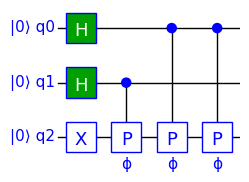

In [21]:
phi = pi/2
qc = QCircuit(3)
qc.qubit_labels({0:KET0, 1:KET0, 2:KET0})
qc.x(2)
qc.h([0,1])
qc.cp(phi, PHI, 1, 2)
qc.cp(phi, PHI, 0, 2)
qc.cp(phi, PHI, 0, 2)
qc.draw()

The pattern of a Hadamard placing the control of a controlled gate into a superposition is clearly recognizable. The controlled gates can use the same target qubit because the target input is an eigenvector of 'P', so the gates don't affect the target qubit. Instead, they kick their phase up to the two qubits above. The first qubit receives a phase of $2\phi$ because it accumulates the phase from two phase gates. This circuit would be followed by an inverse Quantum Fourier Transform (QFT) in place of the second Hadamard gate from our earlier example.

The following circuit shows a 3-qubit QFT that also employs phase kickback. Again the use of Hadamards on the controls can be seen.

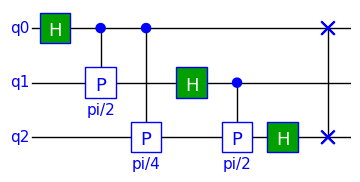

In [22]:
qc = QCircuit(3)
qc.h(0)
qc.cp(pi/2, 'pi/2', 0, 1)
qc.cp(pi/2, 'pi/4', 0, 2)
qc.h(1)
qc.cp(pi/2, 'pi/2', 1, 2)
qc.h(2)
qc.swap(0,2)
qc.draw()